## Análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

berlin_scooters_dataset = pd.read_csv('./dataset/dataset_alquiler.csv')

dataset_cleaned = berlin_scooters_dataset.drop(columns=['indice', 'u_casuales', 'u_registrados'])

dataset_cleaned.describe()


,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres
count,17379.000000,17379.000000,17379.000000,17369.000000,17379.000000,17369.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17369.000000
mean,2.501640,0.502561,6.537775,11.546779,0.028770,3.002533,0.682721,1.425283,0.496987,34.169650,0.627229,18.761185,189.547527
std,1.106918,0.500008,3.438776,6.915469,0.167165,2.005633,0.465431,0.639357,0.192556,133.462049,0.192930,57.544937,181.401604
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.348500,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,0.630000,0.223900,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.636400,0.780000,0.298500,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,803.000000,1.000000,806.000000,977.000000


In [2]:
print("Conteo de valores nulos por columna:")
print(dataset_cleaned.isnull().sum())

Conteo de valores nulos por columna:
fecha                 0
temporada             0
anio                  0
mes                   0
hora                 10
feriado               0
dia_semana           10
dia_trabajo           0
clima                 0
temperatura           0
sensacion_termica     0
humedad               0
velocidad_viento      0
total_alquileres     10
dtype: int64


In [3]:
#Valores faltantes
dataset_cleaned = dataset_cleaned.dropna(subset=['total_alquileres'])
dataset_cleaned['hora'].fillna(dataset_cleaned['hora'].mode()[0], inplace=True)
dataset_cleaned['dia_semana'].fillna(dataset_cleaned['dia_semana'].mode()[0], inplace=True)

#Conversión de 'fecha' -> datetime
dataset_cleaned['fecha'] = pd.to_datetime(dataset_cleaned['fecha'], errors='coerce')

C:\Users\GEEK STORE\AppData\Local\Temp\ipykernel_25864\114712605.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_cleaned['hora'].fillna(dataset_cleaned['hora'].mode()[0], inplace=True)
C:\Users\GEEK STORE\AppData\Local\Temp\ipykernel_25864\114712605.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

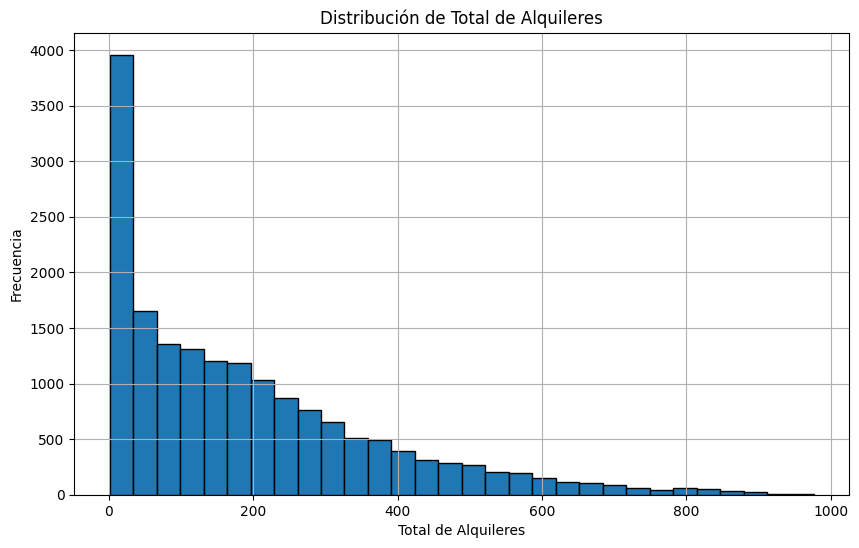

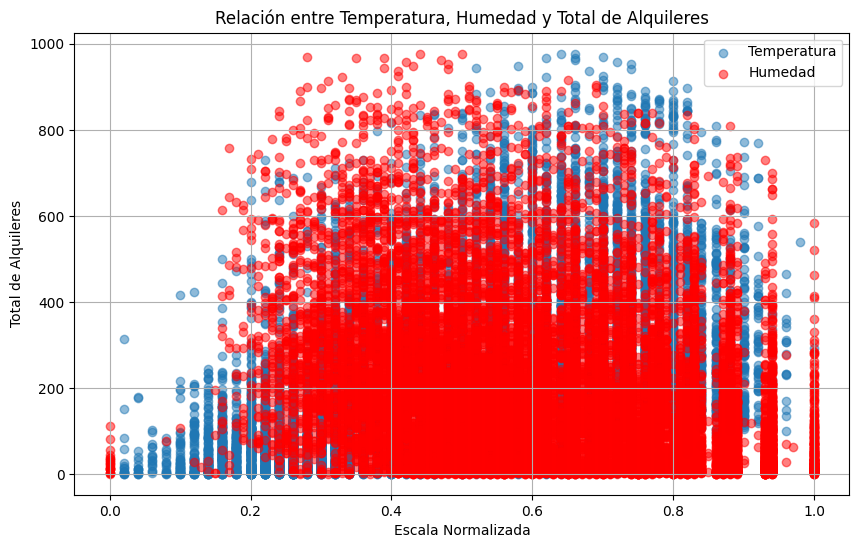

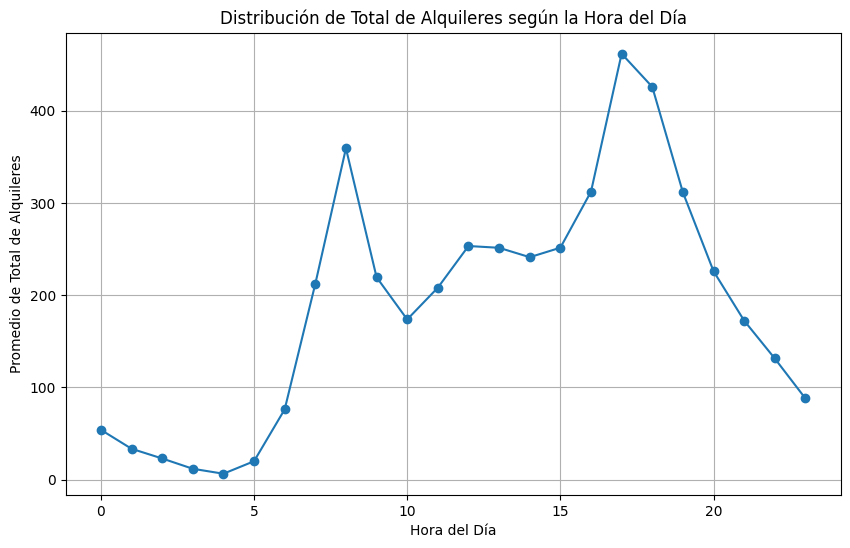

In [4]:
#Distribución de 'total_alquileres'
plt.figure(figsize=(10, 6))
plt.hist(dataset_cleaned['total_alquileres'], bins=30, edgecolor='black')
plt.title('Distribución de Total de Alquileres')
plt.xlabel('Total de Alquileres')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#Relación entre temperatura, humedad y total_alquileres
plt.figure(figsize=(10, 6))
plt.scatter(dataset_cleaned['temperatura'], dataset_cleaned['total_alquileres'], alpha=0.5, label='Temperatura')
plt.scatter(dataset_cleaned['humedad'], dataset_cleaned['total_alquileres'], alpha=0.5, color='red', label='Humedad')
plt.title('Relación entre Temperatura, Humedad y Total de Alquileres')
plt.xlabel('Escala Normalizada')
plt.ylabel('Total de Alquileres')
plt.legend()
plt.grid(True)
plt.show()

#Distribución de total_alquileres según la hora del día
plt.figure(figsize=(10, 6))
plt.plot(dataset_cleaned.groupby('hora')['total_alquileres'].mean(), marker='o')
plt.title('Distribución de Total de Alquileres según la Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Total de Alquileres')
plt.grid(True)
plt.show()

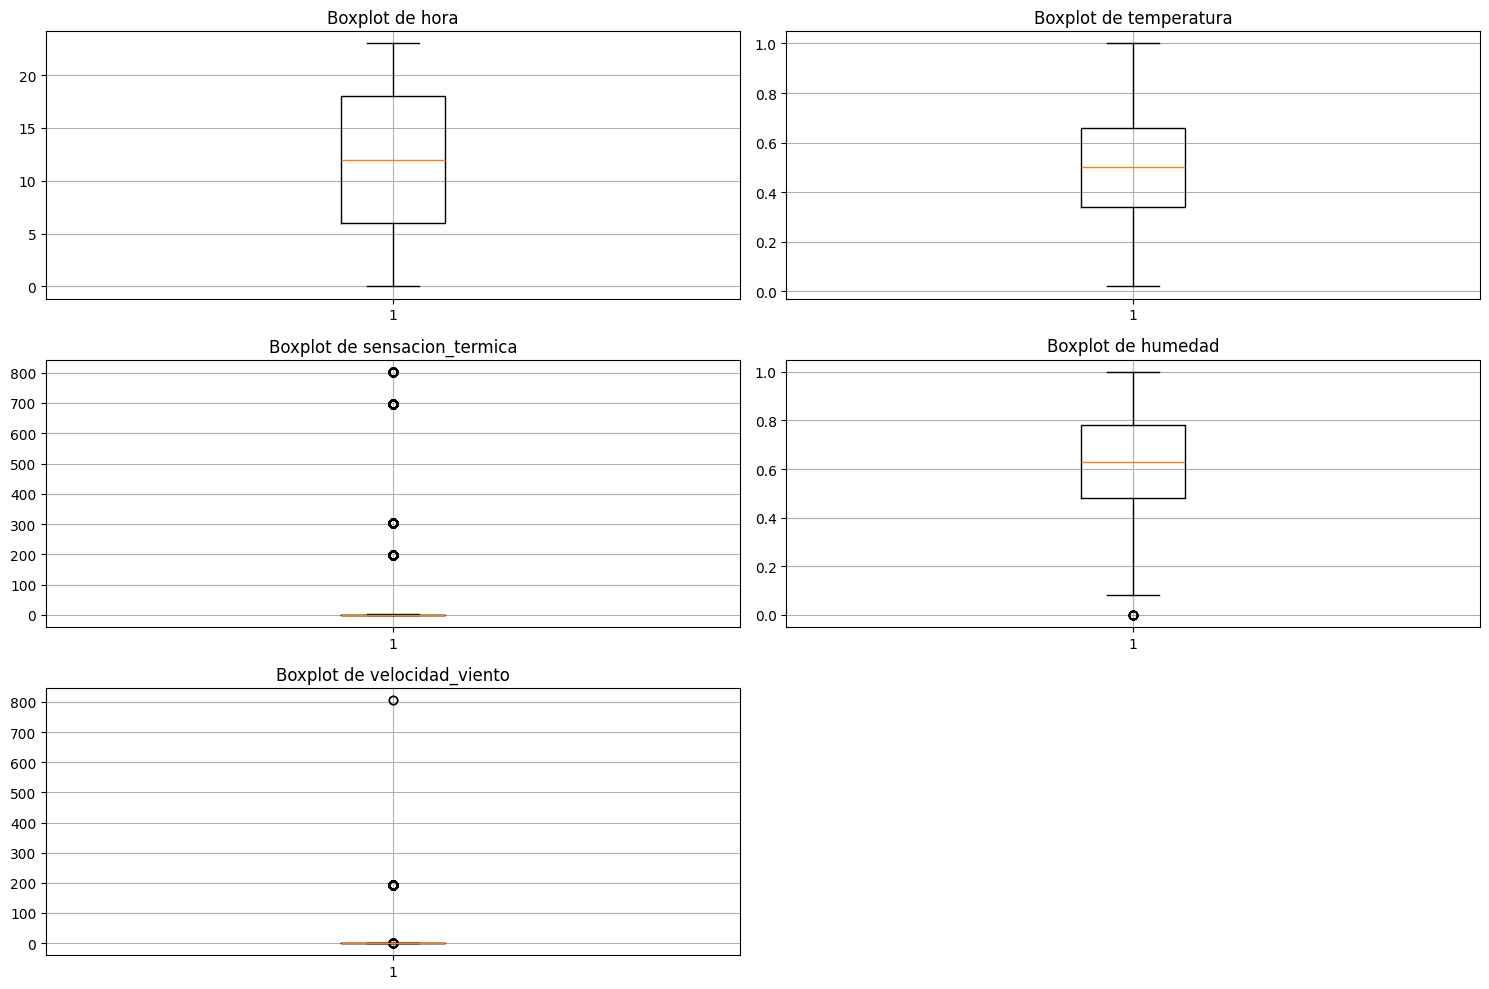

In [5]:
# Seleccionar las columnas numéricas
numeric_columns = ['hora', 'temperatura', 'sensacion_termica', 'humedad', 'velocidad_viento']

# Crear boxplots para detectar valores anómalos en todas las columnas numéricas
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    plt.boxplot(dataset_cleaned[column].dropna())
    plt.title(f'Boxplot de {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()